(1711, 'Stream 1', 47)
(1712, 'Stream 2', 19)
(1713, 'Stream 3', 4)
(1714, 'Stream 4', 16)
(1715, 'Stream 5', 9)
(1716, 'Stream 6', 3)


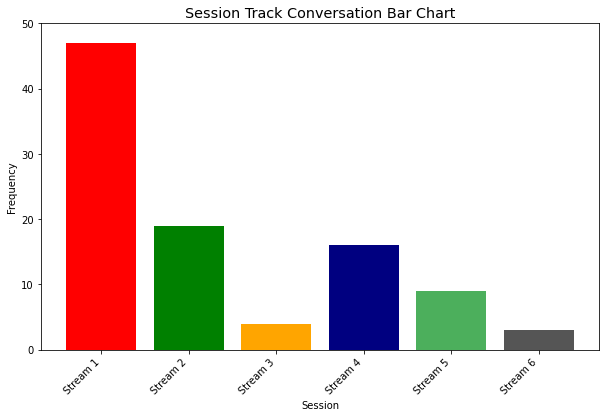

Sentiment(polarity=-0.125, subjectivity=0.4944444444444444)


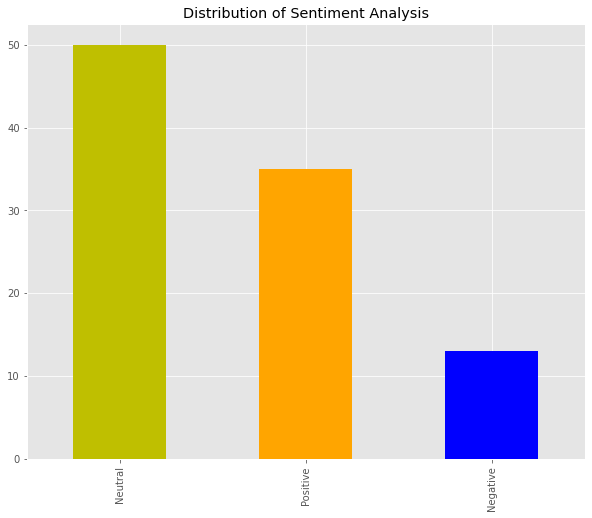

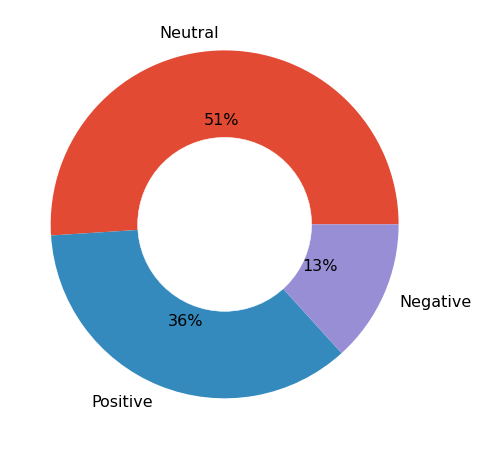

In [1]:
"""
        
                     Using Sentiment analysis to identify how the chat functionalities were used to achieve expected result
                                            How were the chat functions used?
"""

import mysql.connector
import seaborn as sns
from collections import Counter
from matplotlib.gridspec import GridSpec
%matplotlib inline
import pandas as pd 
import numpy as np 
import csv 
import re 
import string 
import glob 
import random 
import requests 
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Natural Language Processing Toolkit
from nltk.corpus import stopwords, words 
from nltk.tokenize import word_tokenize 

from nltk.stem import WordNetLemmatizer 
from nltk import pos_tag 
from textblob import TextBlob 
from IPython.display import display, HTML

#-----------Header Text and Output Description------------#
display(HTML("<h1 style='color:red;text-align:center; font-size:40px;'>Chat Sentiment Analysis</h1><h3 style='color:blue;text-align:center; font-size:25px;'>How were the chat functions used? </h5>"))
display(HTML("""<p>The session chat was used for a variety of purposes, with the main functionality being that of the conference staff sharing the details of the session times (e.g. 'The next session [Session Title] starts here at [Time]'). 
The chat was also used by the administrators to share information pertaining to that live stream, such as delayed sessions due to weather conditions affecting travel, speaker changes and sessions being rescheduled. 
The main topics of conversation in the chats during the sessions between the delegates themselves was regarding technical difficulties. 
Some users also used the chat to ask questions or to thank the speakers for their time.</p>"""))


db = mysql.connector.connect(host ="localhost", 
                             user="root", 
                             passwd="password" , 
                             db = 'BookMeIn2',
                             auth_plugin='mysql_native_password')
mycursor= db.cursor()
message = pd.read_sql_query('SELECT message FROM conversation A CROSS JOIN conversation_message B ON A.id = B.conversationid WHERE keytype = "sessiontrack"', db)
message
data = pd.read_sql_query('SELECT A.id, track_name, COUNT(track_name) as session FROM conversation A CROSS JOIN conversation_message B ON A.id = B.conversationid INNER JOIN session_track ON A.keyid = session_track.id WHERE keytype = "sessiontrack" GROUP BY track_name, A.id', db)

def preprocessmessage(message):
    message = message.lower()  
    message = re.sub(r"http\S+|www\S+|https\S+", '', message, flags=re.MULTILINE)
    message = re.sub(r'\@\w+|\#|\d+', '', message)
    message_tokens = word_tokenize(message)  # convert string to tokens
    filtered_words = [w for w in message_tokens if w not in stop_words]
    filtered_words = [w for w in filtered_words if w in word_list]

    unpunctuated_words = [char for char in filtered_words if char not in string.punctuation]
    unpunctuated_words = ' '.join(unpunctuated_words)
    return "".join(unpunctuated_words) 



mycursor.execute('SELECT A.id, track_name, COUNT(track_name) as session FROM conversation A CROSS JOIN conversation_message B ON A.id = B.conversationid INNER JOIN session_track ON A.keyid = session_track.id WHERE keytype = "sessiontrack" GROUP BY track_name, A.id')
result = mycursor.fetchall
name = []
counts = []
for i in mycursor:
    name.append(i[0])
    print (i)
    counts.append(i[1])
display(HTML("<p>Data: The number of messages sent in each of the streams.</p>"))

    
#plat bar chat using
plt.figure(figsize=(10,6))
plt.bar(data['track_name'], data['session'], color=['r','g','orange','navy', '#4CAF5c', '#555555'])
matplotlib.style.use('ggplot')
plt.ylim(0, 50)
plt.xlabel("Session")
plt.ylabel("Frequency")
plt.title("Session Track Conversation Bar Chart")
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right' )
plt.show()

display(HTML("<p>Chart 1: This chart displays the number of messages sent in each of the live-stream chats. Stream 1 was most popular with 47 messages. </p>"))

text_blob_object = TextBlob(message['message'][0])
print(text_blob_object.sentiment)

def find_pol(text):
    return TextBlob(text).sentiment.polarity

message['Sentiment_Polarity'] = message['message'].apply(find_pol)



def getSubjectivity(message):
    return TextBlob(message).sentiment.subjectivity

def getSentimentTextBlob(polarity):
    if polarity < 0:
        return "Negative"
    elif polarity < 0.045:
        return "Neutral"
    else:
        return "Positive"

def SentimentValues(Sentiment):
    if Sentiment == "Negative":
        return -1
    elif Sentiment == "Positive":
        return 1
    elif Sentiment == "Neutral":
        return 0
    
message['Subjectivity'] = message['message'].apply(getSubjectivity)
message['Polarity'] = message['message'].apply(find_pol)
message['Sentiment']= message['Polarity'].apply(getSentimentTextBlob)
df1 = pd.DataFrame(message.Sentiment.value_counts())
df1

display(HTML("<p>Data: The figures of polarity and subjectivity for the sentiment analysis.</p>"))


message.Sentiment.value_counts().plot(kind='bar',title="Distribution of Sentiment Analysis", 
                                      color=['y','orange','b','navy'], figsize = (10,8));


size_of_groups = message.Sentiment.value_counts()
plt.figure(figsize=(15,8))
labels = ['Neutral', 'Positive', 'Negative']

my_circle=plt.Circle( (0,0), 0.5, color='white')

textprops = {'color': 'Green','fontsize':16}
plt.pie(size_of_groups, labels = labels, textprops = {'color': 'black','fontsize':16}, autopct='%.0f%%')

p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


df = pd.DataFrame(message)
df

display(HTML("<p>Charts 2 and 3: The percentage split between positive, neutral and negative interactions within the chat. Most (51%) of the interactions were neutral, with a higher percentage of positive than negative interactions occurring.</p>"))

#----------Footer Section for report generation navigation -----------------#
footer = "<div style='width:100%; text-align:center;'><a href='4-virtual-and-after-event-viewers.html' style='color:blue;'>Previous</a> <a href='6-chat-usage-analysis.html' style='color:blue;'>Next</a></div>"
display(HTML(footer))
